<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/arima_ipc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: ARIMA para IPC
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 11 de Noviembre 2024 <br>

* * *

<br>
<br>

# ARIMA para el índice IPC

Una serie de tiempo se define como una serie de puntos de datos registrados en diferentes intervalos de tiempo. El orden temporal puede ser diario, mensual o incluso anual.

Los pronósticos de series de tiempo es el proceso de utilizar un modelo estadístico para predecir valores futuros de una serie de tiempo basándose en resultados pasados.

Los pronósticos es el paso en el que queremos predecir los valores futuros que va a tomar la serie. Predecir una serie suele tener un enorme valor comercial.

Los pronósticos de una serie de tiempo puede dividirse en dos tipos.

- Si sólo utilizamos los valores anteriores de la serie para predecir sus valores futuros, se denomina Pronósticos Univariante.

- Si utilizamos predictores distintos de la serie (como variables exógenas) para predecirla, se denomina Pronósticos multivariante.

Este cuaderno se centra en un tipo concreto de método univariante denominado modelización ARIMA.

---

Imagina que tienes un portafolio de acciones que sigue el comportamiento del Índice de Precios y Cotizaciones. Quieres pronosticar el valor de tu portafolio 3 meses en el futuro.

- Utiliza las 30 acciones el indice por separado.
- Los datos al cierre mensuales desde el 2015.
- Para utilizar *autoArima* necesitas los datos en el formato correcto. https://nixtlaverse.nixtla.io/statsforecast/docs/models/autoets.html#read-data
- Divide tus datos en entrenamiento y prueba.
- Dos acciones: 1) calcula la diferenciación (o retornos), 2) gráfica las series diferenciadas, 3) determina si son estacionarías, 4) utiliza la prueba Dickey-Fuller test o KPSS test
- Utiliza autoarima para ajustar y evaluar tu modelo (selecciona una métrica de error que permita comparar diferentes escalas).
- Por medio de la métrica de error, visualiza la serie que mejor se ajusta y la que peor se ajusta.
- Compara los resultados de los modelos ARIMA, ETS. ¿Cuál fue mejor?

## Descarga los datos

In [7]:
import pandas as pd
import yfinance as yf

In [8]:
from google.colab import drive
drive.mount('/content/drive')

portafolio = pd.read_excel("/content/drive/MyDrive/series_tiempo/ipc_componentes.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [10]:
ticker = yf.Tickers(portafolio['ticker yahoo'].tolist())
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  35 of 35 completed


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702614,24.689907,37.795330,11.671397,154.705292,NaN,34.200207,15.430020,11.529756,37.656040,...,38.958511,38.346153,32.615517,262.346069,130.751785,NaN,56.302006,88.730614,23.547867,22.602913
2015-02-01 00:00:00+00:00,70.285492,29.111984,43.193314,11.671397,161.849319,NaN,37.858749,16.780148,13.123650,44.382278,...,39.022583,39.573223,34.200771,281.710815,138.726120,NaN,57.645130,92.414062,23.328476,28.567894
2015-03-01 00:00:00+00:00,69.477180,27.682896,42.006329,11.124300,162.236099,NaN,38.791328,16.133081,12.534602,41.835014,...,42.517670,41.436150,31.358221,235.338303,126.094284,NaN,56.418171,91.677383,23.035959,29.864660
2015-04-01 00:00:00+00:00,69.892456,27.997473,43.400570,11.737051,171.416748,NaN,36.944111,18.360479,13.333282,41.735298,...,45.450413,42.735744,34.585350,230.718750,136.695755,NaN,63.874294,101.554527,23.328476,28.399246
2015-05-01 00:00:00+00:00,70.519691,27.223537,43.626659,11.744343,179.291824,NaN,37.374531,16.991690,12.990942,42.756989,...,46.048355,40.197918,36.726257,242.054321,130.000092,NaN,61.689007,105.901917,22.910900,30.310600


In [11]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,ds,y,unique_id
0,2015-01-01,65.702614,AC.MX
1,2015-02-01,70.285492,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892456,AC.MX
4,2015-05-01,70.519691,AC.MX


In [12]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

## Análisis ALSEA



In [13]:
accion = df[df['unique_id'] == 'ALSEA.MX']

<Axes: xlabel='ds'>

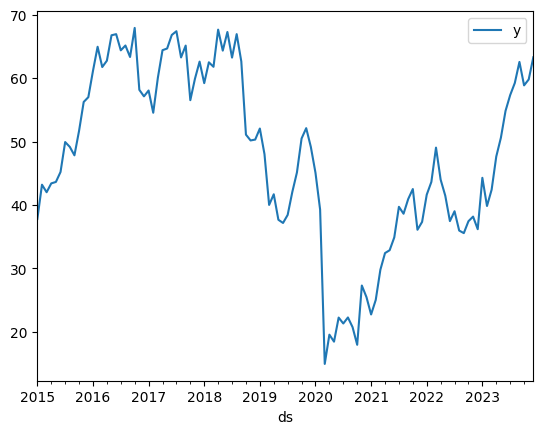

In [14]:
accion.plot(x='ds', y='y')

<Axes: ylabel='Frequency'>

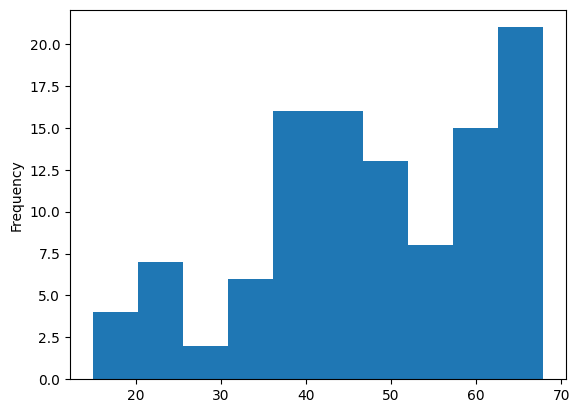

In [15]:
accion['y'].plot(kind='hist')

In [16]:
accion['y'].skew()

-0.4018100397550376

In [17]:
accion['y_diff'] = accion['y'].diff()
accion['y_ret'] = accion['y'].pct_change()
accion.dropna(inplace=True)
accion.head()

<ipython-input-17-539dd89c613c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_diff'] = accion['y'].diff()
<ipython-input-17-539dd89c613c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_ret'] = accion['y'].pct_change()
<ipython-input-17-539dd89c613c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

,ds,y,unique_id,y_diff,y_ret
217,2015-02-01,43.193314,ALSEA.MX,5.397984,0.142821
218,2015-03-01,42.006329,ALSEA.MX,-1.186985,-0.027481
219,2015-04-01,43.400570,ALSEA.MX,1.394241,0.033191
220,2015-05-01,43.626659,ALSEA.MX,0.226089,0.005209
221,2015-06-01,45.197704,ALSEA.MX,1.571045,0.036011


<Axes: xlabel='ds'>

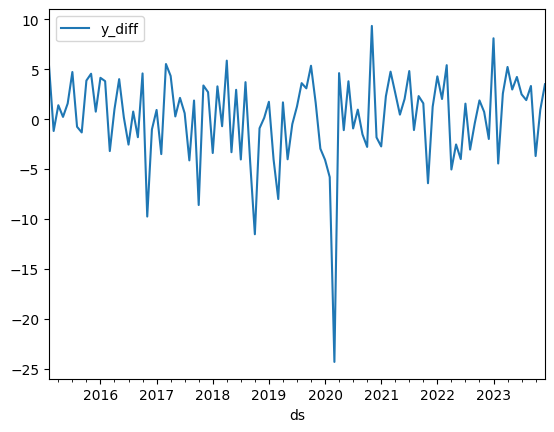

In [18]:
accion.plot(x='ds', y='y_diff')

<Axes: xlabel='ds'>

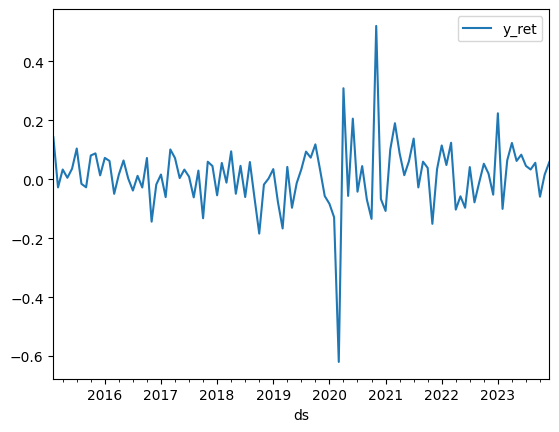

In [19]:
accion.plot(x='ds', y='y_ret')

In [20]:
accion['y_diff'].skew()

-1.858445033811714

<Axes: ylabel='Frequency'>

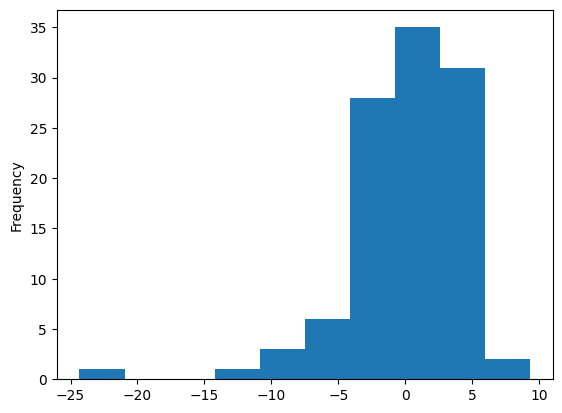

In [21]:
accion['y_diff'].plot(kind='hist')

In [22]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [23]:
Augmented_Dickey_Fuller_Test_func(accion['y_diff'], 'Diff ALSEA.MX')

Dickey-Fuller test results for columns: Diff ALSEA.MX
Test Statistic                -1.047684e+01
p-value                        1.242732e-18
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [24]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'ALSEA.MX')

Dickey-Fuller test results for columns: ALSEA.MX
Test Statistic                  -1.464265
p-value                          0.551109
No Lags Used                     0.000000
Number of observations used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


ALSEA diferenciada una vez es estacionaría y no necesita una transformación matemática pero tiene un valor atípico.

## CEMEXCPO.MX

In [25]:
accion = df[df['unique_id'] == 'CEMEXCPO.MX']

<Axes: xlabel='ds'>

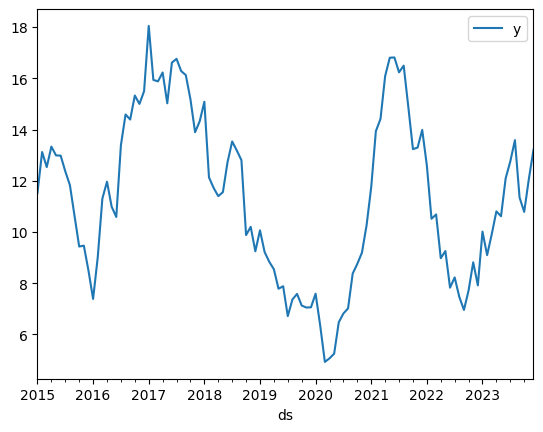

In [26]:
accion.plot(x='ds', y='y')

<Axes: ylabel='Frequency'>

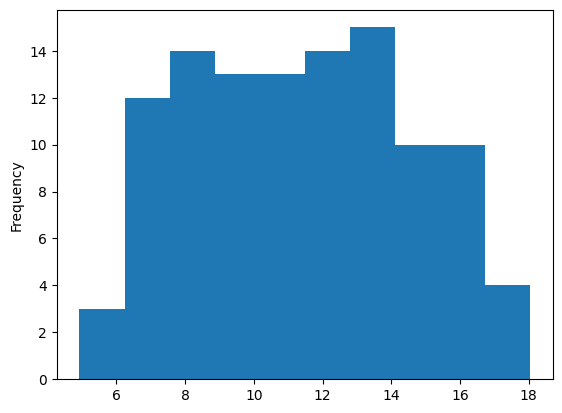

In [27]:
accion['y'].plot(kind='hist')

In [28]:
accion['y'].skew()

0.04941522467457977

In [29]:
accion['y_diff'] = accion['y'].diff()
accion['y_ret'] = accion['y'].pct_change()
accion.dropna(inplace=True)
accion.head()

<ipython-input-29-539dd89c613c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_diff'] = accion['y'].diff()
<ipython-input-29-539dd89c613c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_ret'] = accion['y'].pct_change()
<ipython-input-29-539dd89c613c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

,ds,y,unique_id,y_diff,y_ret
865,2015-02-01,13.123650,CEMEXCPO.MX,1.593894,0.138242
866,2015-03-01,12.534602,CEMEXCPO.MX,-0.589047,-0.044884
867,2015-04-01,13.333282,CEMEXCPO.MX,0.798680,0.063718
868,2015-05-01,12.990942,CEMEXCPO.MX,-0.342340,-0.025676
869,2015-06-01,12.981933,CEMEXCPO.MX,-0.009009,-0.000694


<Axes: xlabel='ds'>

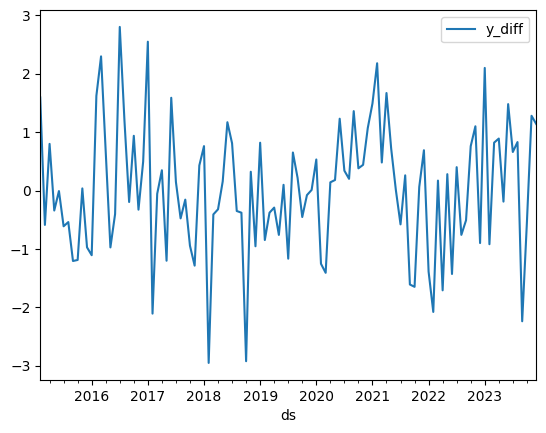

In [30]:
accion.plot(x='ds', y='y_diff')

<Axes: ylabel='Frequency'>

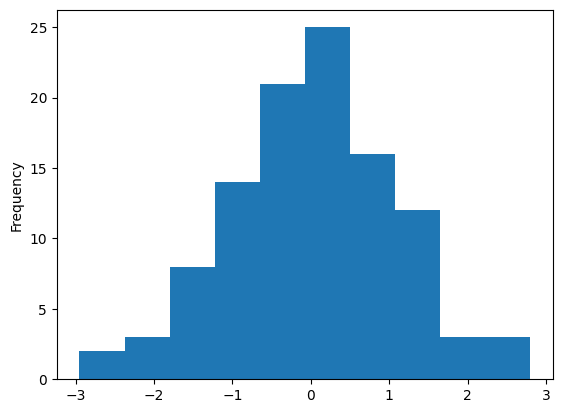

In [31]:
accion['y_diff'].plot(kind='hist')

In [32]:
accion['y_diff'].skew()

-0.09665264321995451

In [33]:
Augmented_Dickey_Fuller_Test_func(accion['y_diff'], 'CEMEXCPO.MX')

Dickey-Fuller test results for columns: CEMEXCPO.MX
Test Statistic                -9.545669e+00
p-value                        2.653493e-16
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [34]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'CEMEXCPO.MX')

Dickey-Fuller test results for columns: CEMEXCPO.MX
Test Statistic                  -3.131969
p-value                          0.024276
No Lags Used                     6.000000
Number of observations used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


## Instantiating Model

In [35]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.4 MB/s eta 0:00:00


In [36]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [37]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoARIMA(season_length=season_length)]


In [38]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [39]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [40]:
test_hat = sf.forecast(fitted = True, h = horizon)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [41]:
train_hat = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [42]:
test_hat.head()

,ds,AutoARIMA
unique_id,,
AC.MX,2023-01-01,147.468292
AC.MX,2023-02-01,147.468292
AC.MX,2023-03-01,147.468292
AC.MX,2023-04-01,147.468292
AC.MX,2023-05-01,147.468292


In [43]:
from sklearn import metrics
import numpy as np

In [44]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoARIMA']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [45]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MAPE score for AC.MX: 7.900391520273894
MAPE score for ALFAA.MX: 6.6325188483774875
MAPE score for ALSEA.MX: 30.63567692170678
MAPE score for AMXB.MX: 8.891545588138184
MAPE score for ASURB.MX: 9.972192117869175
MAPE score for BBAJIOO.MX: 25.22312155661579
MAPE score for BIMBOA.MX: 14.460510549350461
MAPE score for BOLSAA.MX: 5.793284233482701
MAPE score for CEMEXCPO.MX: 29.307509474676973
MAPE score for CHDRAUIB.MX: 18.26979743467581
MAPE score for CUERVO.MX: 11.54767310184302
MAPE score for FEMSAUBD.MX: 20.358494426620908
MAPE score for GAPB.MX: 13.300970737061371
MAPE score for GCARSOA1.MX: 30.235099926295533
MAPE score for GCC.MX: 16.884977365621264
MAPE score for GENTERA.MX: 7.597672216765226
MAPE score for GFINBURO.MX: 16.507722793409467
MAPE score for GFNORTEO.MX: 14.145310249480936
MAPE score for GMEXICOB.MX: 21.23921112311844
MAPE score for GRUMAB.MX: 10.200129832742947
MAPE score for KIMBERA.MX: 12.951515979114719
MAPE score for KOFUBL.MX: 9.710469023172989
MAPE score for LAB

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

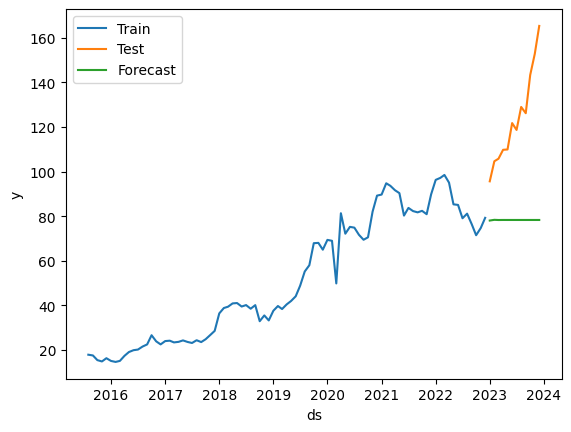

In [47]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [48]:
arima_string(sf.fitted_[24,0].model_)

'ARIMA(0,1,0)                   '

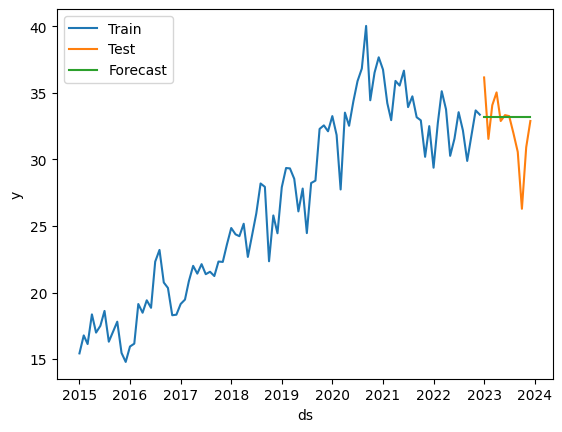

In [49]:
sns.lineplot(train[train['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'BOLSAA.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [50]:
arima_string(sf.fitted_[6,0].model_)

'ARIMA(2,2,1)                   '

## Bottom Up y Agrupación

### Entrenamiento

In [82]:
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [59]:
sector_train = pd.merge(train, portafolio[['segmento', 'ticker yahoo', 'peso']], left_on='unique_id', right_on='ticker yahoo', how='left')

In [60]:
sector_train['valor portafolio'] = sector_train['y'] * sector_train['peso']

In [61]:
sector_train_ = sector_train.groupby(['ds', 'segmento'])['valor portafolio'].sum().reset_index()

In [62]:
sector_train_.head()

,ds,segmento,valor portafolio
0,2015-01-01,Communication Services,9.846938
1,2015-01-01,Consumer Discretionary,3.881428
2,2015-01-01,Consumer Staples,14.317977
3,2015-01-01,Financials,4.776745
4,2015-01-01,Health Care,0.302385


<Axes: xlabel='ds', ylabel='valor portafolio'>

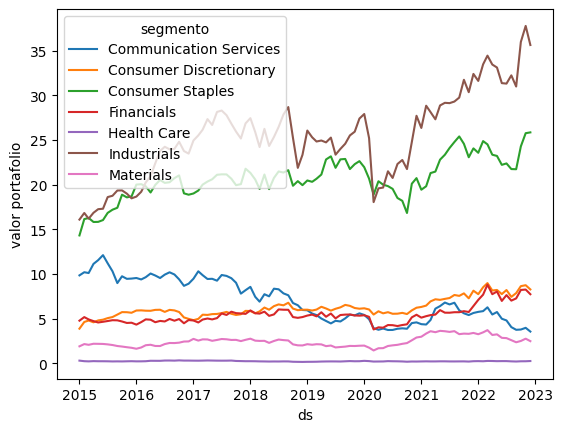

In [70]:
sns.lineplot(x='ds', y='valor portafolio', hue='segmento', data=sector_train_)

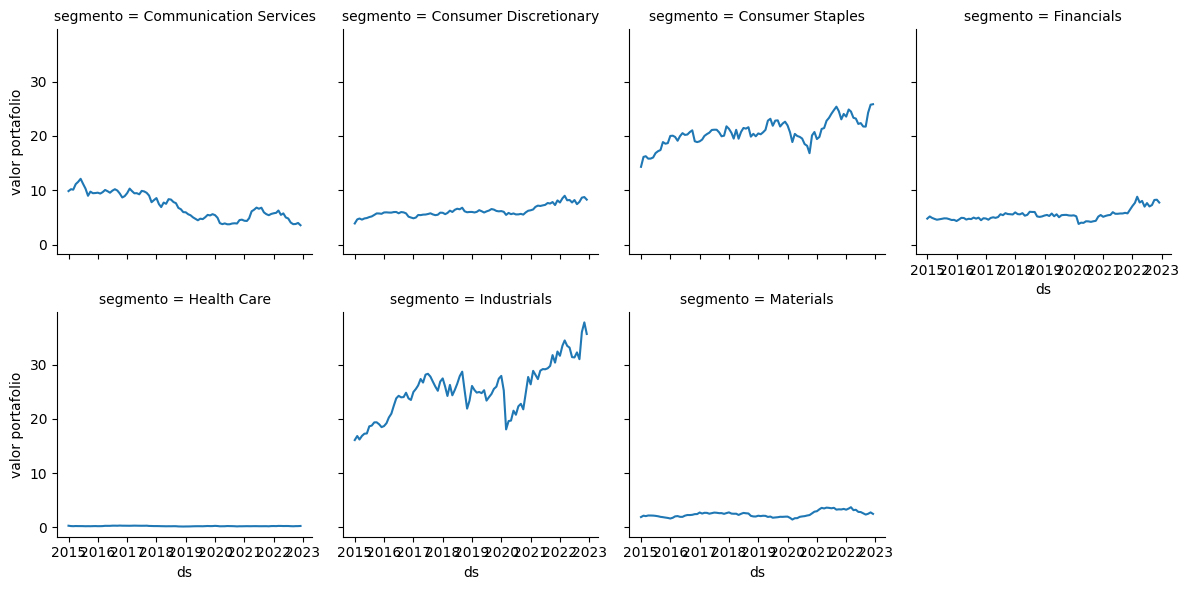

In [80]:
g = sns.FacetGrid(sector_train_, col="segmento", col_wrap=4, margin_titles=True)
g.map(sns.lineplot, "ds", "valor portafolio", 'segmento')

In [65]:
portafolio_train = sector_train_.groupby('ds')['valor portafolio'].sum().reset_index()

In [66]:
portafolio_train.head()

,ds,valor portafolio
0,2015-01-01,51.120114
1,2015-02-01,55.376482
2,2015-03-01,54.576025
3,2015-04-01,55.563832
4,2015-05-01,56.436260


<Axes: xlabel='ds', ylabel='valor portafolio'>

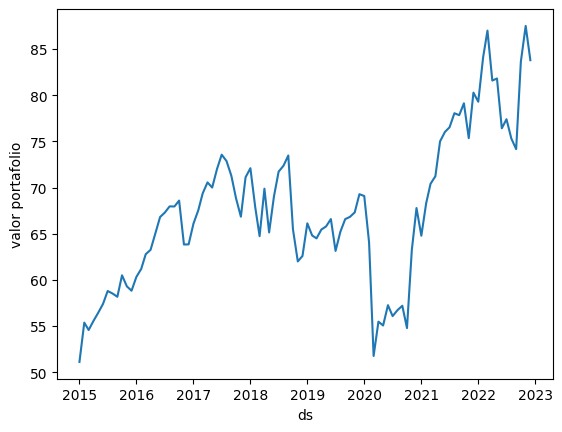

In [81]:
sns.lineplot(x='ds', y='valor portafolio', data=portafolio_train)